<a href="https://colab.research.google.com/github/pacomm5/PLANTILLAS2/blob/main/CLUSTER%20KNN%20PRUEBA%20PASTILLAS2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# SUBIMOS PROVISIONALMENTE EL ARCHIVO A GOOGLE COLAB. 
# El archivo esta aquí C:\Users\FJMartin\OneDrive - JARMAUTO\Documentos\2018\POWER BI INFORMES\DATOS MAESTROS\MACHINE LEARNING
# y es Pastillas_clusterKNN.csv


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from google.colab import files # Para manejar los archivos y, por ejemplo, exportar a su navegador
import glob # Para manejar los archivos y, por ejemplo, exportar a su navegador
from google.colab import drive # Montar tu Google drive

In [3]:
!pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [5]:
# Suppress Warning

import warnings
warnings.filterwarnings("ignore")

In [6]:
dataset = pd.read_csv('/content/Pastillas_clusterKNN.csv', sep=";", decimal=",")


In [7]:
dataset.head()

,Tall,Matricula,F_matriculacion,Pastillas_FechaCierre,Antigüedad_dias,Antigüedad_años,Km
0,2,7255KVN,15-2-19,29-4-22,1169.0,3.25,91369.0
1,6,6558JSN,9-9-16,29-4-22,2058.0,5.72,137785.0
2,1,5048HWT,7-4-14,29-4-22,2944.0,8.18,66390.0
3,1,9290KXS,25-6-19,29-4-22,1039.0,2.89,34623.0
4,1,9114KZH,31-7-19,29-4-22,1003.0,2.79,77995.0


In [8]:
dataset["Tall"] = dataset["Tall"].astype(str)
dataset["Antigüedad_años"] = dataset["Antigüedad_años"].astype(float)


In [10]:
dataset.shape

(11307, 7)

In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11307 entries, 0 to 11306
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Tall                   11307 non-null  object 
 1   Matricula              11307 non-null  object 
 2   F_matriculacion        11307 non-null  object 
 3   Pastillas_FechaCierre  11307 non-null  object 
 4   Antigüedad_dias        11307 non-null  float64
 5   Antigüedad_años        11307 non-null  float64
 6   Km                     11307 non-null  float64
dtypes: float64(3), object(4)
memory usage: 618.5+ KB


In [12]:
dataset.describe()

,Antigüedad_dias,Antigüedad_años,Km
count,11307.000000,11307.000000,11307.000000
mean,2265.127355,6.292288,107239.735031
std,1481.327104,4.114826,67972.709329
min,94.000000,0.260000,0.000000
25%,1146.000000,3.180000,59819.000000
50%,1799.000000,5.000000,89341.000000
75%,3083.000000,8.560000,135591.000000
max,21327.000000,59.240000,951156.000000


In [13]:
dataset.isnull().sum()

Tall                     0
Matricula                0
F_matriculacion          0
Pastillas_FechaCierre    0
Antigüedad_dias          0
Antigüedad_años          0
Km                       0
dtype: int64

#CHEQUEANDO OUTLIERS

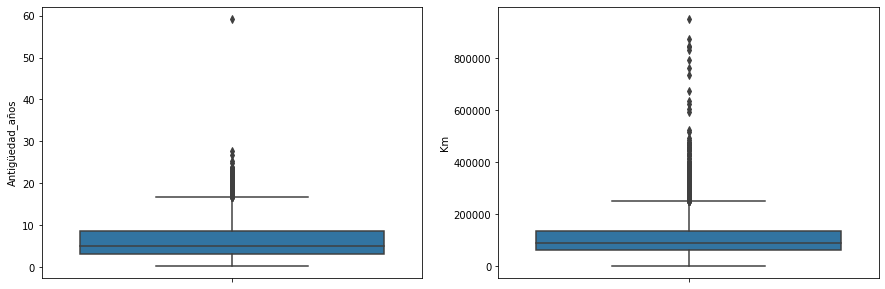

In [15]:
plt.figure(figsize=(15,5)) # aqui poenmos el tamaño de cada cuadradro. 

plt.subplot(1,2,1)
sns.boxplot(data=dataset, y="Antigüedad_años") # este va a ocupar el primer lugar de la segunda fila. 

plt.subplot(1,2,2)
sns.boxplot(data=dataset, y="Km") # este va a ocupar el segundo lugar de la primera fila. 

plt.show()
# lo que estamos viendo es un diagrama de bigotes donde apreciamos que no hay outliers.

# lo voy a hacer con outliers, mas adelante lo veré quitandolos. 

#EDA

## ANALISIS POR VARIABLE.

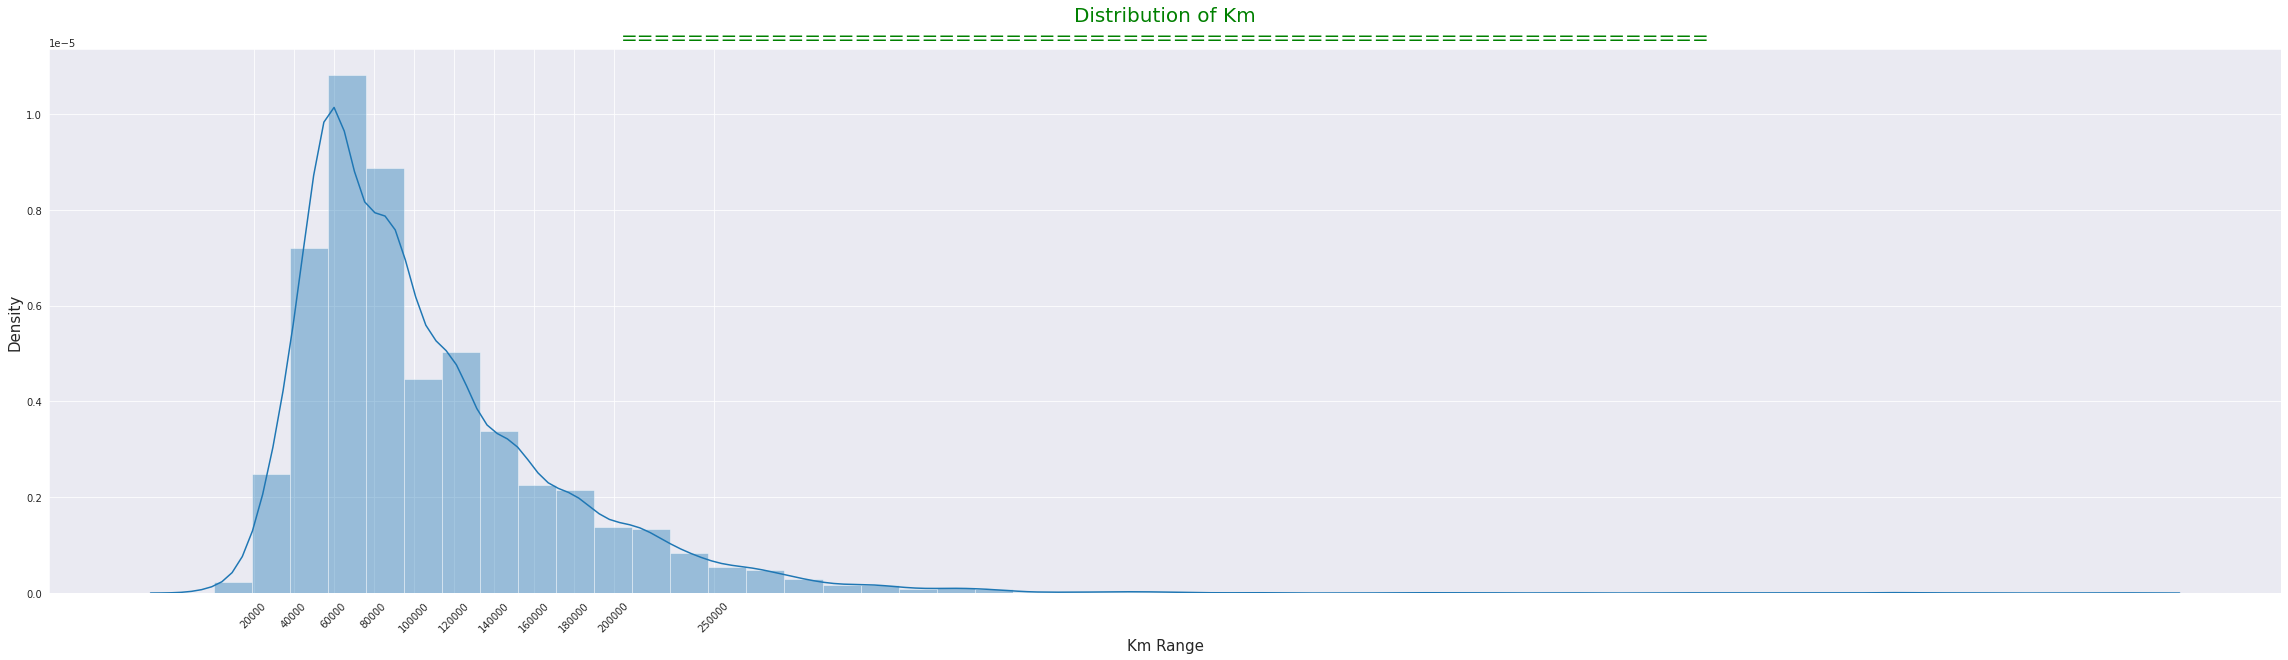

In [43]:
# Checking KM

plt.figure(figsize=(40,10)) # tamaño del gráfico
sns.set_style('darkgrid') # color del mismo

sns.distplot(dataset.Km) # valor que vamos a representar
plt.title("Distribution of Km\n=================================================================", fontsize=20, color="green") # titulo
plt.xticks([20000,40000,60000,80000,100000,120000,140000,160000,180000,200000,250000]) # OJO IMPORTANTE CON ESTO CAMBIO LAS ESCALAS DE X
plt.xticks(rotation=45) # y así las roto 45 grados. 
plt.xlabel("Km Range", fontsize=15, ) # distancia entre barras
plt.ylabel("Density", fontsize=15) # distancias en el eje x

plt.show()

# veo que se concentra la gran parte entre 60, 80 y 100.000 km luego está bastante disperso. 

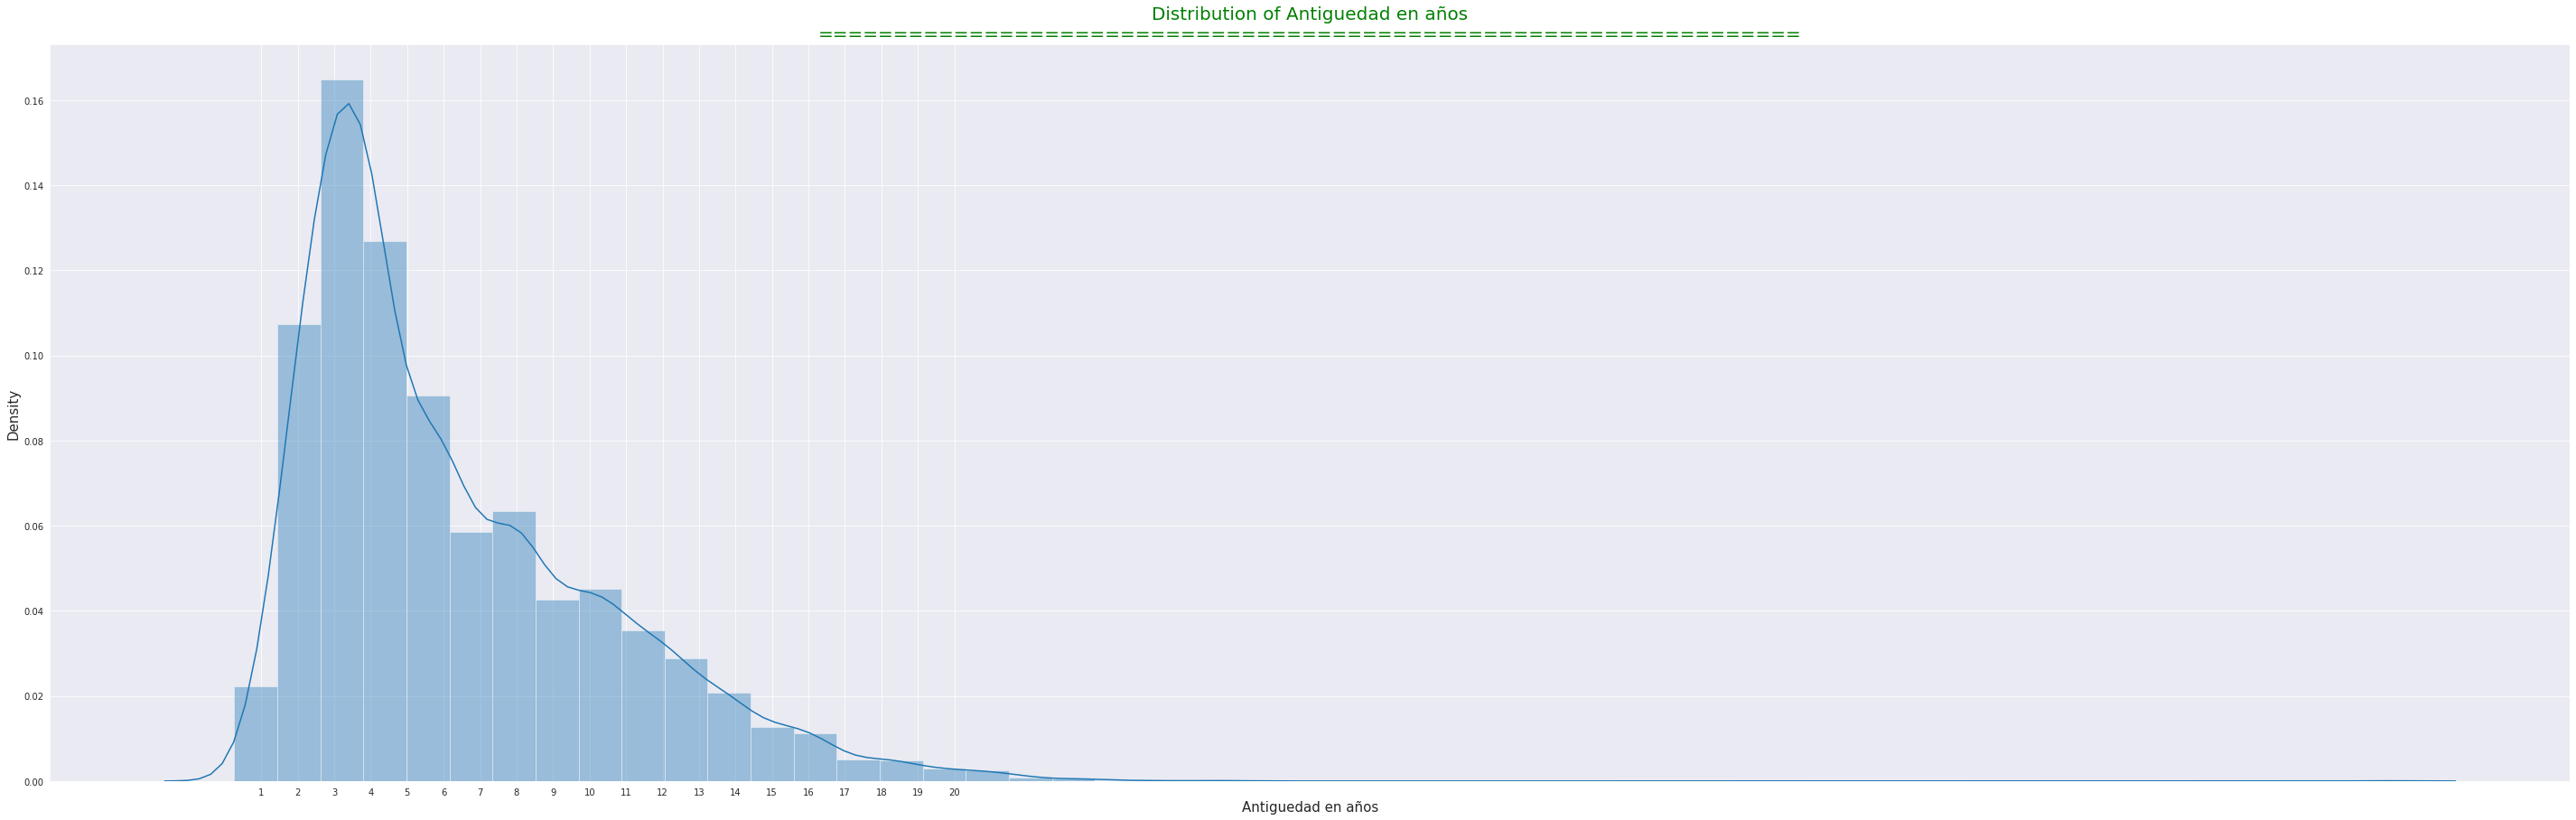

In [33]:
# Checking edad del vehículo

plt.figure(figsize=(50,15)) # tamaño del gráfico
sns.set_style('darkgrid') # color del mismo

sns.distplot(dataset.Antigüedad_años) # valor que vamos a representar
plt.title("Distribution of Antiguedad en años\n=================================================================", fontsize=20, color="green") # titulo
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]) # OJO IMPORTANTE CON ESTO CAMBIO LAS ESCALAS DE X
plt.xlabel("Antiguedad en años", fontsize=15) # distancia entre barras
plt.ylabel("Density", fontsize=15) # distancias en el eje x

plt.show()

# hay clientes de diferentes edades, no podemos decir que este concentrado en unas cuantas. 

## vamos a hacer un graficos con dos variables. 

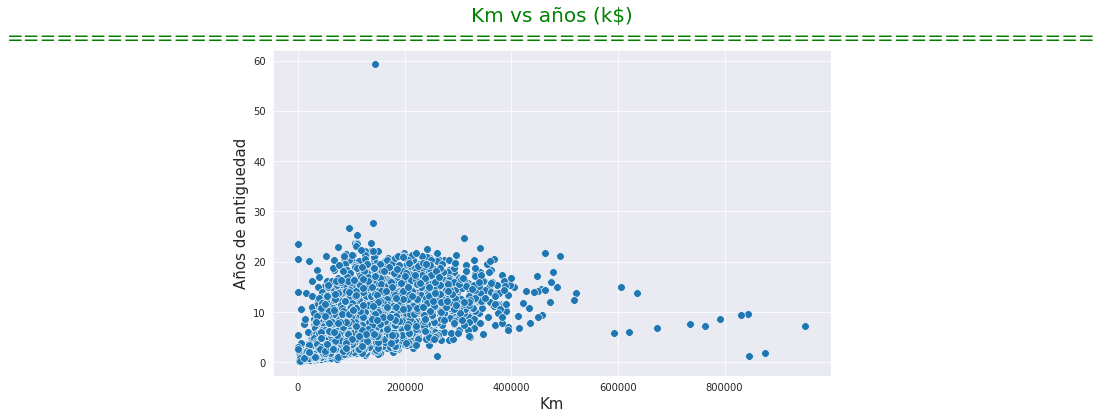

In [45]:
# Años vs Km

plt.figure(figsize=(10,6)) # tamaño del grafico
sns.set_style('darkgrid') # estilo del grafico

sns.scatterplot(data=dataset, x="Km", y= "Antigüedad_años", s=60) # tipo del gráfico
# le decimos el dataframe a tomar en cuenta y sus variables así como el color y el tamañao
plt.title("Km vs años (k$)\n=================================================================", fontsize=20, color="green")
plt.xlabel("Km", fontsize=15)
plt.ylabel("Años de antiguedad", fontsize=15)
plt.show()